In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/covid_19_india.csv')

In [3]:
df2 = pd.read_csv('Data/StatewiseTestingDetails.csv')

In [4]:
df.shape


(9291, 9)

In [5]:
df.Date.value_counts()

11/06/20    37
14/07/20    36
04/06/20    36
23/06/20    36
29/06/20    36
            ..
01/02/20     1
11/02/20     1
09/02/20     1
01/03/20     1
12/02/20     1
Name: Date, Length: 315, dtype: int64

In [6]:
df.loc[df['Date']=='24/06/20',:]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3351,3352,24/06/20,8:00 AM,Andaman and Nicobar Islands,-,-,40,0,50
3352,3353,24/06/20,8:00 AM,Andhra Pradesh,-,-,4599,119,10002
3353,3354,24/06/20,8:00 AM,Arunachal Pradesh,-,-,22,0,148
3354,3355,24/06/20,8:00 AM,Assam,-,-,3762,9,5831
3355,3356,24/06/20,8:00 AM,Bihar,-,-,6104,56,8153
3356,3357,24/06/20,8:00 AM,Chandigarh,-,-,322,6,418
3357,3358,24/06/20,8:00 AM,Chhattisgarh,-,-,1553,12,2362
3358,3359,24/06/20,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,29,0,120
3359,3360,24/06/20,8:00 AM,Delhi,-,-,39313,2301,66602
3360,3361,24/06/20,8:00 AM,Goa,-,-,205,1,909


Here, we can see that, the suvey is not taken multiple times a day in one place. So, Time is mostly not useful for now. We will only look at the Date.

In [7]:
df['NewDate'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,NewDate
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-30
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-31
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2020-02-01
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-02
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-03


C:\Users\91891\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


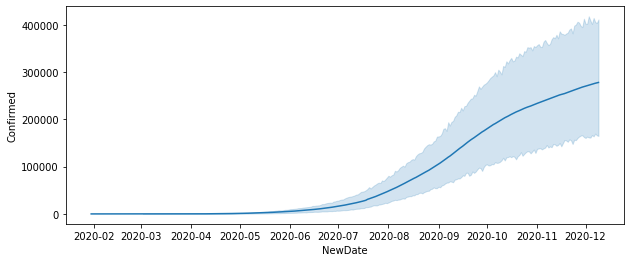

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (10,4))
sns.lineplot(df.NewDate,df.Confirmed)

Here we can see an increasing trend as in the confirmed cases among all the states and territories

In [9]:
data = pd.DataFrame({'date':df.NewDate,'Confirmed':df.Confirmed})
data.set_index('date')
data.head()

,date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


In [10]:
data = data.set_index('date')

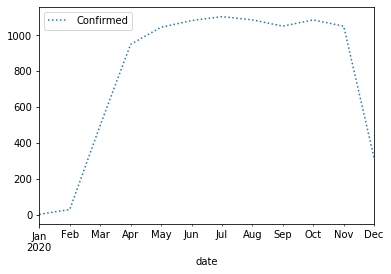

In [11]:
test = data.copy()

test['Confirmed'] = np.ones((test.shape[0],1))

dtest = test.resample('M').sum()
dtest.plot(style = [':','--','-'])

In [12]:
weekly = data.resample('W').sum()

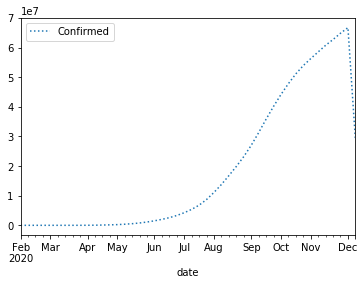

In [13]:
weekly.plot(style=[':','--','-'])

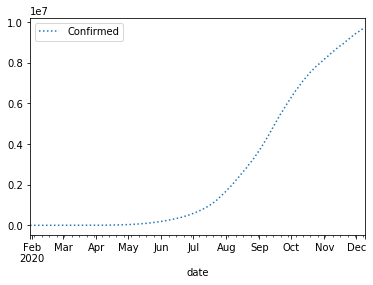

In [14]:
daily = data.resample('D').sum()
daily.plot(style = [':','--','-'])

Plotting the Average confirmed cases in India over a weekly and daily period show us peaks in confirmed cases since we dont have the data of every single day. So the cases drop to zero. But more importantly we can also see an exponential rise of cases as the time goes on.

In [15]:
df2.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [16]:
data = df.loc[df['State/UnionTerritory']=='Kerala',:][['NewDate','Confirmed']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 9272
Data columns (total 2 columns):
NewDate      315 non-null datetime64[ns]
Confirmed    315 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.4 KB


In [17]:
a = pd.DatetimeIndex(df.Date)
a.month

Int64Index([1, 1, 1, 2, 3, 4, 5, 6, 7, 8,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='Date', length=9291)

In [18]:
len(df.Date.unique())

315

There are 315 days from start to end (31-01-2020 to 09-12-2020). So, each date is accounted for.

In [19]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,NewDate
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-30
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-31
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2020-02-01
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-02
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-03


### Data Exploration

In [20]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,NewDate
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-30
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-31
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2020-02-01
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-02
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-03


In [21]:
total = df.groupby(['NewDate']).sum()
total

,Sno,Cured,Deaths,Confirmed
NewDate,,,,
2020-01-30,1,0,0,1
2020-01-31,2,0,0,1
2020-02-01,3,0,0,2
2020-02-02,4,0,0,3
2020-02-03,5,0,0,3
...,...,...,...,...
2020-12-05,319690,9058822,139700,9608211
2020-12-06,320915,9100792,140182,9644222
2020-12-07,322140,9139901,140573,9677203


In [22]:
data = total['Confirmed']

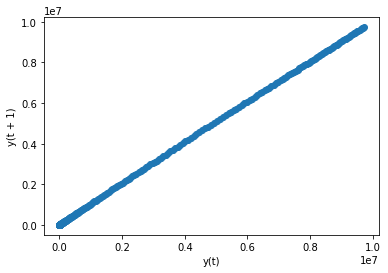

In [23]:
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot

lag_plot(data)
plt.show()

As you can see, the data is highly correlated to previous values. This means forecasting will work great

In [24]:
values = pd.DataFrame(data.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.999977
t+1  0.999977  1.000000


There is a positive correlation of about 0.84 between the two different time steps. So, they are highly correlated. Which means we can autopredict future values using the past values we have.

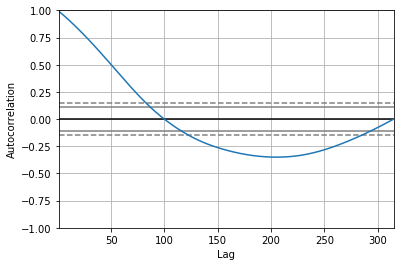

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
plt.show()

Seems like a lag value more than 100 is causing no correlation or only a little bit of negative correlation

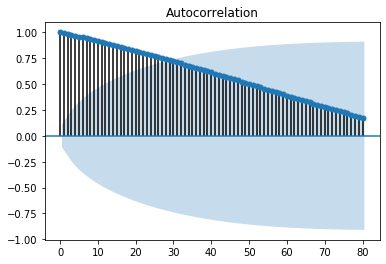

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data, lags= 80)
plt.show()

Here you can see a more clear picture of what is going on from 0 to 80. The correlation decreases as the lag value or time step increases

#### Persistence Model

This is nothing but a model that basically copies the actual test data but adds a lag value of 1. This can be treated as a base line model to compare with the AR model.

Test MSE: 1152676649.000


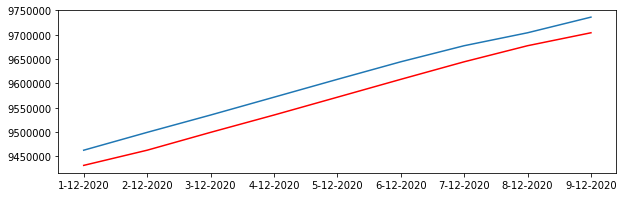

In [27]:
from sklearn.metrics import mean_squared_error
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-9], X[len(X)-9:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
fig= plt.figure(figsize=(10,3))
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.xticks(range(0,9),['1-12-2020','2-12-2020','3-12-2020','4-12-2020','5-12-2020','6-12-2020','7-12-2020','8-12-2020','9-12-2020'])
plt.show()

As you can see, the predicted values(red) lag behind by a day.

#### Auto-Regression Model

Coefficients: [ 2.74465622e+02  1.79701746e+00 -7.40910815e-01  1.55285513e-01
 -3.03270831e-01  9.79381499e-02  3.12367106e-02  3.29707534e-01
 -6.74251007e-01  2.10513117e-01  2.12804519e-01 -1.72282008e-01
  7.75414780e-02 -1.19293809e-01  3.07569193e-01 -2.82014786e-01
 -4.93047681e-02 -9.29440344e-02  3.87076285e-01 -1.98591329e-01
  1.63149676e-01  1.55195396e-01 -6.42965699e-01  4.53695581e-01
 -1.73923587e-01  4.08401032e-02  3.02286980e-02]
predicted=9464871.583438, expected=9462809.000000

C:\Users\91891\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,



predicted=9506716.264307, expected=9499413.000000
predicted=9553350.487302, expected=9534964.000000
predicted=9597444.055246, expected=9571559.000000
predicted=9640958.817293, expected=9608211.000000
predicted=9681148.104911, expected=9644222.000000
predicted=9715738.758806, expected=9677203.000000
predicted=9747286.698402, expected=9703770.000000
predicted=9786487.028678, expected=9735850.000000
Test RMSE: 32394.211


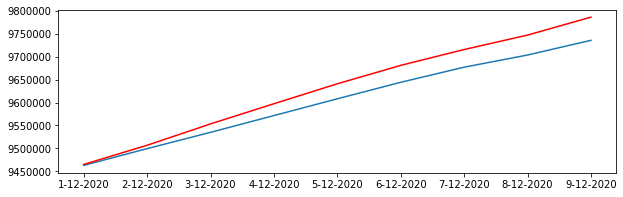

In [28]:
from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
# train autoregression
X = data.values
train, test = X[1:len(X)-9], X[len(X)-9:]
model = AutoReg(train, lags=26)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
fig = plt.figure(figsize = (10,3))
plt.plot(test)
plt.plot(predictions, color='red')
plt.xticks(range(0,9),['1-12-2020','2-12-2020','3-12-2020','4-12-2020','5-12-2020','6-12-2020','7-12-2020','8-12-2020','9-12-2020'])
plt.show()

This is the prediction of the confirmed cases from 1st to the 9th of December,2020. Compared to the pesistence model(baseline), it does seem to do better. But this model is predicting the values for all 9 days at once. So, when it is predicting the value on 9th December, it is not taking into account the value of 8th December, that it previously predicted.

predicted=25380.324595, expected=21700.000000
predicted=26331.697642, expected=23452.000000
predicted=28858.590420, expected=24893.000000
predicted=32444.323223, expected=26605.000000
predicted=34094.793605, expected=28160.000000
predicted=36685.087450, expected=29834.000000
predicted=41234.621107, expected=31709.000000
predicted=46198.576478, expected=33330.000000
predicted=49264.859160, expected=34972.000000
predicted=53401.083462, expected=37157.000000
predicted=61725.809901, expected=40124.000000
predicted=70401.165686, expected=42836.000000
predicted=73417.040547, expected=46711.000000
predicted=80646.624298, expected=49391.000000
predicted=88704.821833, expected=52952.000000
predicted=94938.231087, expected=56342.000000
predicted=105598.360490, expected=59662.000000
predicted=115409.700167, expected=62939.000000
predicted=123425.103586, expected=67152.000000
predicted=132495.012929, expected=70756.000000
predicted=141434.452457, expected=74281.000000
predicted=150411.885227, expe

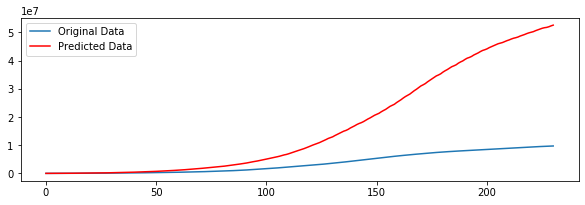

In [185]:
X = data.values
train, test = X[0:84], X[84:]
model = AutoReg(train, lags=26)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
window = 26
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
fig = plt.figure(figsize = (10,3))
plt.plot(test,label='Original Data')
plt.plot(predictions, color='red',label = 'Predicted Data')
plt.legend(loc = 2)
plt.show()

In [30]:
predictions[1]

26331.69764228935

In [31]:
data.iloc[85:86]

NewDate
2020-04-24    23452
Name: Confirmed, dtype: int64

By manually getting the hypothesis function using the coefficients of the AutoReg function, we predicted the value for each day on every iteration. So, basically the model becomes sligthly better after every day. As you can see, this method seems to have the least error.

In [32]:
datadf = total.drop(['Cured','Sno','Deaths'],axis = 1)
new_df = datadf.copy()

### MA, CMA and EMA

In [33]:
new_df['EMA'] = datadf.iloc[:,0].ewm(span=40,adjust=False).mean()
new_df['CMA'] = datadf.expanding(min_periods=4).mean()

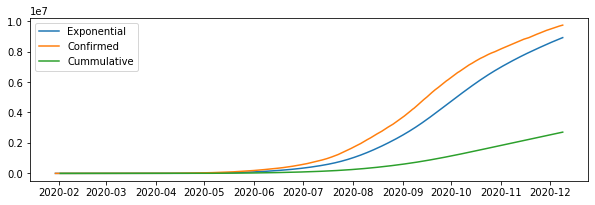

In [34]:
fig = plt.figure(figsize=(10,3))
plt.plot(new_df['EMA'],label='Exponential')
plt.plot(new_df['Confirmed'],label = 'Confirmed')
plt.plot(new_df['CMA'],label = 'Cummulative')
plt.legend(loc = 2)

Typically, EMA does outperform CMA

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = 315-9
    train, test = newdata.values, newtest.values
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = sqrt(mean_squared_error(test, predictions))
    return error

In [254]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model_with_plot(X, arima_order):
    # prepare training dataset
    train, test = X[0:54], X[54:]
    train_size = len(train)
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    print(train.shape)
    print(test.shape)
    print(len(predictions))
    error = sqrt(mean_squared_error(test, predictions))
    fg = plt.figure(figsize = (10,3))
    plt.plot(test,color = 'blue',label = 'Actual Observation')
    plt.plot(predictions, color='red',label = 'Prediction')
    plt.legend()
    plt.show()
    return error

In [202]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    

In [39]:
import warnings
warnings.filterwarnings("ignore")
evaluate_models(data.values,[5,6,7],[4,2,3],[1,2,3])

Best ARIMANone MSE=inf


(54,)
(261,)
261


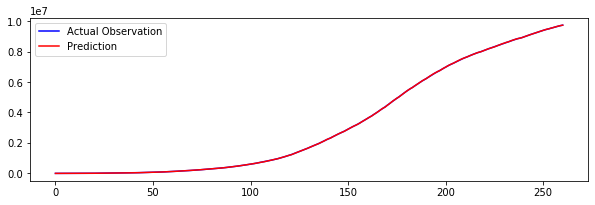

3710.8840198150274

In [255]:
evaluate_arima_model_with_plot(data.values,[5,2,1])

(84,)
(231,)
231


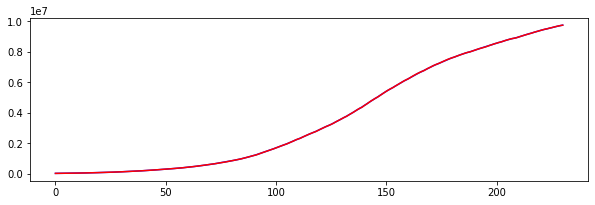

3943.392725138957

In [41]:
evaluate_arima_model_with_plot(data.values,[5,2,1])

This seems to be really promising, but there's no harm done in trying another forecasting method

### Exponential Smoothing

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
def expo_smoothn(dataset):
    model = ExponentialSmoothing(dataset, trend='add')
    # fit model
    model_fit = model.fit(optimized=True)
    # make one step forecast
    yhat = model_fit.predict(len(dataset), len(dataset))
    return yhat

In [225]:
def evaluate_expo_smoothn_with_plot(X):
    # prepare training dataset
    train, test = X[0:27], X[27:54]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        yhat = expo_smoothn(history)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = sqrt(mean_squared_error(test, predictions))
    fg = plt.figure(figsize = (10,3))
    plt.plot(test,color = 'blue',label = 'Actual Observation')
    plt.plot(predictions, color='red',label = 'Prediction')
    plt.legend()
    plt.show()
    return error

In [170]:
total[total.index.month==2]

,Sno,Cured,Deaths,Confirmed
NewDate,,,,
2020-02-01,3,0,0,2
2020-02-02,4,0,0,3
2020-02-03,5,0,0,3
2020-02-04,6,0,0,3
2020-02-05,7,0,0,3
2020-02-06,8,0,0,3
2020-02-07,9,0,0,3
2020-02-08,10,0,0,3
2020-02-09,11,0,0,3


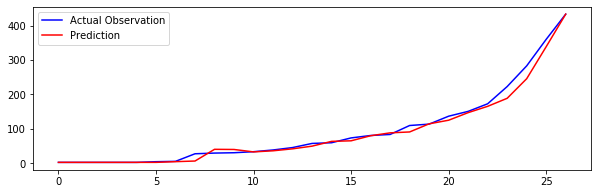

12.774430023851574

In [226]:
evaluate_expo_smoothn_with_plot(data.values)

In [102]:
data[0:53]

NewDate
2020-01-30      1
2020-01-31      1
2020-02-01      2
2020-02-02      3
2020-02-03      3
2020-02-04      3
2020-02-05      3
2020-02-06      3
2020-02-07      3
2020-02-08      3
2020-02-09      3
2020-02-10      3
2020-02-11      3
2020-02-12      3
2020-02-13      3
2020-02-14      3
2020-02-15      3
2020-02-16      3
2020-02-17      3
2020-02-18      3
2020-02-19      3
2020-02-20      3
2020-02-21      3
2020-02-22      3
2020-02-23      3
2020-02-24      3
2020-02-25      3
2020-02-26      3
2020-02-27      3
2020-02-28      3
2020-02-29      3
2020-03-01      3
2020-03-02      5
2020-03-03      6
2020-03-04     28
2020-03-05     30
2020-03-06     31
2020-03-07     34
2020-03-08     39
2020-03-09     46
2020-03-10     58
2020-03-11     60
2020-03-12     74
2020-03-13     81
2020-03-14     84
2020-03-15    110
2020-03-16    114
2020-03-17    137
2020-03-18    151
2020-03-19    173
2020-03-20    223
2020-03-21    283
2020-03-22    360
Name: Confirmed, dtype: int64

23 March 2020

In [47]:
data.head()

NewDate
2020-01-30    1
2020-01-31    1
2020-02-01    2
2020-02-02    3
2020-02-03    3
Name: Confirmed, dtype: int64

In [48]:
data.head()

NewDate
2020-01-30    1
2020-01-31    1
2020-02-01    2
2020-02-02    3
2020-02-03    3
Name: Confirmed, dtype: int64

In [49]:
data.tail()

NewDate
2020-12-05    9608211
2020-12-06    9644222
2020-12-07    9677203
2020-12-08    9703770
2020-12-09    9735850
Name: Confirmed, dtype: int64

In [50]:
data.iloc[84:85]

NewDate
2020-04-23    21700
Name: Confirmed, dtype: int64

In [73]:
newdata = data[(data.index.month<=2)|((data.index.month==3)&(data.index.day<=16))]
newtest = data[((data.index.month==3)&(data.index.day>=17))|((data.index.month==3)&(data.index.day<=23))]
newtest

NewDate
2020-03-01       3
2020-03-02       5
2020-03-03       6
2020-03-04      28
2020-03-05      30
2020-03-06      31
2020-03-07      34
2020-03-08      39
2020-03-09      46
2020-03-10      58
2020-03-11      60
2020-03-12      74
2020-03-13      81
2020-03-14      84
2020-03-15     110
2020-03-16     114
2020-03-17     137
2020-03-18     151
2020-03-19     173
2020-03-20     223
2020-03-21     283
2020-03-22     360
2020-03-23     433
2020-03-24     519
2020-03-25     606
2020-03-26     694
2020-03-27     724
2020-03-28     909
2020-03-29    1024
2020-03-30    1251
2020-03-31    1397
Name: Confirmed, dtype: int64

predicted=133.586985, expected=3.000000
predicted=54.653912, expected=5.000000
predicted=11.564738, expected=6.000000
predicted=4.208373, expected=28.000000
predicted=61.748285, expected=30.000000
predicted=13.867692, expected=31.000000
predicted=38.415126, expected=34.000000
predicted=33.136243, expected=39.000000
predicted=48.112464, expected=46.000000
predicted=52.521560, expected=58.000000
predicted=63.843375, expected=60.000000
predicted=69.885571, expected=74.000000
predicted=82.660878, expected=81.000000
predicted=90.924146, expected=84.000000
predicted=101.979914, expected=110.000000
predicted=117.681256, expected=114.000000
predicted=133.586985, expected=137.000000
predicted=157.040826, expected=151.000000
predicted=166.225071, expected=173.000000
predicted=202.517197, expected=223.000000
predicted=239.114006, expected=283.000000
predicted=310.361593, expected=360.000000
predicted=392.052005, expected=433.000000
predicted=472.714769, expected=519.000000
predicted=573.802228, e

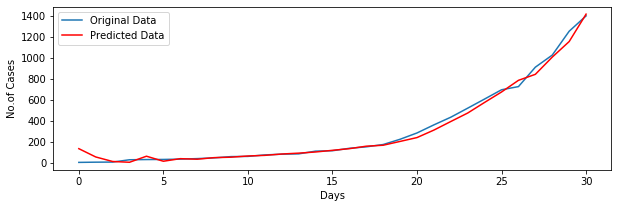

In [74]:
X = data.values
train, test = newdata.values, newtest.values
model = AutoReg(train, lags=6)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
window = 6
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
fig = plt.figure(figsize = (10,3))
plt.plot(test,label = 'Original Data')
plt.plot(predictions, color='red',label = 'Predicted Data')
plt.xlabel('Days')
plt.ylabel('No.of Cases')
plt.legend()
plt.show()

In [53]:
predictions[-1]/test[-1]

0.6431045859452339

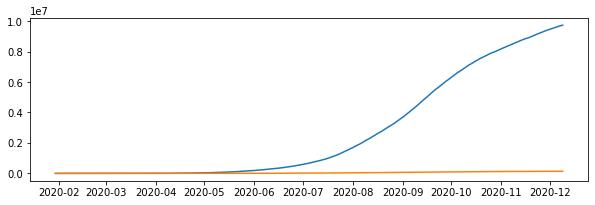

In [54]:
fig = plt.figure(figsize = (10,3))
plt.plot(total.Confirmed)
plt.plot(total.Deaths)

Lets see the difference between the infection rate in February and November

In [55]:
feb = total[total.index.month==2]
rate1 = sum(feb.Confirmed)*100/1380004385
nov = total[total.index.month==11]
rate2 = sum(nov.Confirmed)*100/1380004385
rate2/rate1

3076237.3488372094

the infection rate of November seems to be 3076237.34 times greater than the infection rate of February

In [56]:
april = total[total.index.month==4]
rate1 = sum(april.Confirmed)*100/1380004385
nov = total[total.index.month==11]
rate2 = sum(nov.Confirmed)*100/1380004385
rate2/rate1

626.2549935849181

Unlock Phase

In [57]:
june = total[total.index.month>=6]

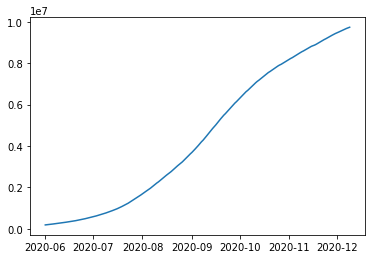

In [58]:
plt.plot(june.Confirmed)

predicted=-1419765869.110593, expected=519.000000
predicted=1745147696194.182617, expected=606.000000
Test RMSE: 1234006178095.017


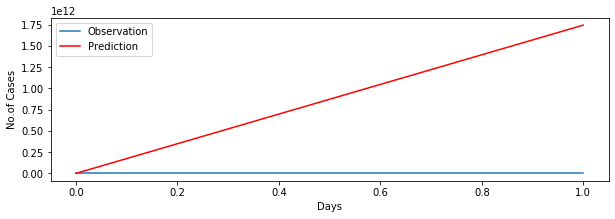

In [141]:
train, test = X[0:54],X[54:56]
model = AutoReg(train, lags=50)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
window = 26
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
fig = plt.figure(figsize = (10,3))
plt.plot(test,label = 'Observation')
plt.plot(predictions, color='red',label = 'Prediction')
plt.xlabel('Days')
plt.ylabel('No.of Cases')
plt.legend()
plt.show()

In [138]:
data[54:55]

NewDate
2020-03-24    519
Name: Confirmed, dtype: int64

The unlocking of the lockdown does not seem to be detrimental. This plot shows that the unlock hasn't caused any downside.

Nov 7 – Nov 28 (Deepavali Season)

In [60]:
deepavali_days = data[(data.index.month==11)&(data.index.day>=7)&(data.index.day<=28)]

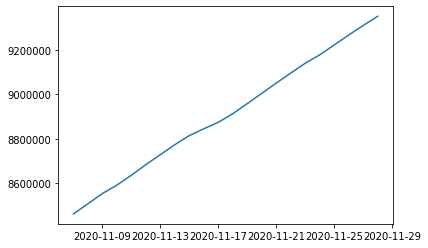

In [61]:
plt.plot(deepavali_days)

In [62]:
train = data[((data.index.month==10)&(data.index.day>=16))|((data.index.day<7)&(data.index.month==11))]
train.head()

NewDate
2020-10-16    7370468
2020-10-17    7432680
2020-10-18    7494551
2020-10-19    7550273
2020-10-20    7597063
Name: Confirmed, dtype: int64

predicted=8453828.787922, expected=8462080.000000
predicted=8503461.241693, expected=8507754.000000
predicted=8548478.969344, expected=8553657.000000
predicted=8593722.406580, expected=8591730.000000
predicted=8631248.350112, expected=8636011.000000
predicted=8674893.093250, expected=8683916.000000
predicted=8722109.764509, expected=8728795.000000
predicted=8766343.915212, expected=8773479.000000
predicted=8810385.867797, expected=8814579.000000
predicted=8850895.317515, expected=8845127.000000
predicted=8881004.384912, expected=8874290.000000
predicted=8909748.352847, expected=8912907.000000
predicted=8947810.479849, expected=8958483.000000
predicted=8992731.615624, expected=9004365.000000
predicted=9037954.354602, expected=9050597.000000
predicted=9083522.064562, expected=9095806.000000
predicted=9128081.473621, expected=9139865.000000
predicted=9171507.406593, expected=9177840.000000
predicted=9208936.758249, expected=9222216.000000
predicted=9252675.136368, expected=9266705.000000


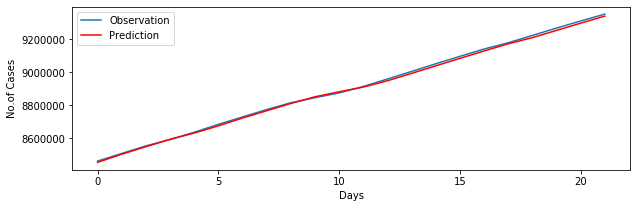

In [63]:
train = train.values
test = deepavali_days.values
model1 = AutoReg(train, lags=1)
model_fit = model1.fit()
coef = model_fit.params
# walk forward over time steps in test
window = 1
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
fig = plt.figure(figsize = (10,3))
plt.plot(test,label = 'Observation')
plt.plot(predictions, color='red',label = 'Prediction')
plt.xlabel('Days')
plt.ylabel('No.of Cases')
plt.legend()
plt.show()

There seems to be no real difference between the predicted values and the actual values, showing that there is no significant impact of festival season on covid cases.

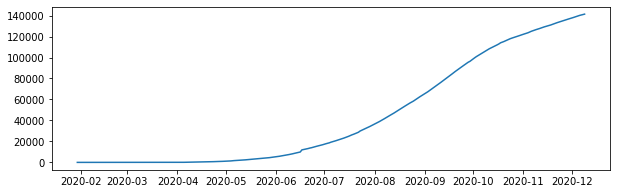

In [64]:
deaths = total.Deaths

fig = plt.figure(figsize = (10,3))
plt.plot(deaths)

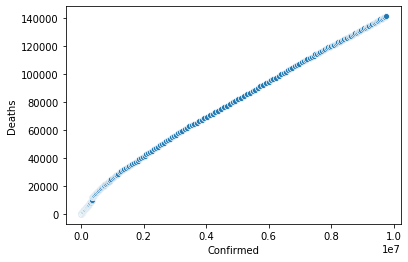

In [65]:
sns.scatterplot(total.Confirmed,total.Deaths)

Highly Correlated

In [66]:
deepavali_days_d = deaths[(deaths.index.month==11)&(deaths.index.day>=7)&(deaths.index.day<=28)]
train = deaths[(deaths.index.month<=10)|((deaths.index.day<7)&(deaths.index.month==11))]

predicted=125472.382656, expected=125562.000000
predicted=126035.717562, expected=126121.000000
predicted=126553.249989, expected=126611.000000
predicted=127043.216077, expected=127059.000000
predicted=127504.572265, expected=127571.000000
predicted=128028.396594, expected=128121.000000
predicted=128579.921388, expected=128668.000000
predicted=129102.373200, expected=129188.000000
predicted=129584.660452, expected=129635.000000
predicted=130010.456826, expected=130070.000000
predicted=130443.249291, expected=130519.000000
predicted=130902.942616, expected=130993.000000
predicted=131392.074206, expected=131578.000000
predicted=131998.394168, expected=132162.000000
predicted=132566.837923, expected=132726.000000
predicted=133112.629493, expected=133227.000000
predicted=133620.909783, expected=133738.000000
predicted=134134.043692, expected=134218.000000
predicted=134620.162211, expected=134699.000000
predicted=135126.638424, expected=135223.000000
predicted=135645.089720, expected=135715

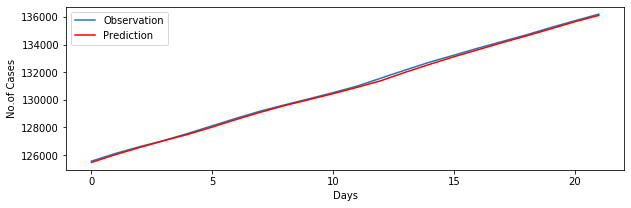

In [67]:
train = train.values
test = deepavali_days_d.values
model2 = AutoReg(train, lags=26)
model_fit = model2.fit()
coef = model_fit.params
# walk forward over time steps in test
window = 26
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
fig = plt.figure(figsize = (10,3))
plt.plot(test,label = 'Observation')
plt.plot(predictions, color='red',label = 'Prediction')
plt.xlabel('Days')
plt.ylabel('No.of Cases')
plt.legend()
plt.show()

In [68]:
data.values

array([      1,       1,       2,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       5,       6,      28,
            30,      31,      34,      39,      46,      58,      60,
            74,      81,      84,     110,     114,     137,     151,
           173,     223,     283,     360,     433,     519,     606,
           694,     724,     909,    1024,    1251,    1397,    1834,
          2069,    2547,    3072,    3577,    4281,    4789,    5274,
          5865,    6761,    7529,    8447,    9352,   10815,   11933,
         12759,   13835,   14792,   16116,   17656,   18985,   20471,
         21700,   23452,   24893,   26605,   28160,   29834,   31709,
         33330,   34972,   37157,   40124,   42836,   46711,   49391,
         52952,   56

In [69]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,NewDate
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-30
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-31
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2020-02-01
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-02
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-03


In [70]:
from statsmodels.tsa.stattools import adfuller

In [71]:
res = adfuller(data)

In [72]:
res[1]

0.838060752455154

predicted=7119766261.999531, expected=519.000000
predicted=9572820179.541374, expected=606.000000
predicted=13808603547.821800, expected=694.000000
predicted=21237213409.697411, expected=724.000000
predicted=21601666363.688496, expected=909.000000
predicted=30975151950.238754, expected=1024.000000
predicted=34222637627.205776, expected=1251.000000
predicted=34887888074.414146, expected=1397.000000
predicted=51513009370.092216, expected=1834.000000
predicted=52559772446.904449, expected=2069.000000
predicted=67062029714.693718, expected=2547.000000
predicted=73310809760.879730, expected=3072.000000
predicted=83108333238.091370, expected=3577.000000
predicted=110855929419.465439, expected=4281.000000
predicted=145042102549.594330, expected=4789.000000
predicted=190462546184.866394, expected=5274.000000
predicted=231945681036.427429, expected=5865.000000
predicted=282787326555.584961, expected=6761.000000
predicted=338546458810.887085, expected=7529.000000
predicted=388563139557.048218, e

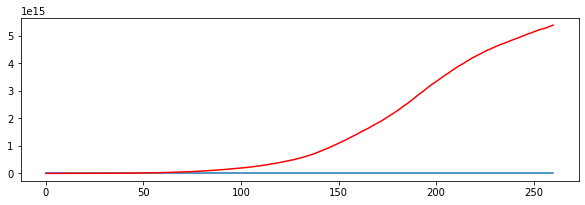

In [249]:
X = data.values
train, test = X[0:54], X[54:]
model = AutoReg(train, lags=26)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
window = 17
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
fig = plt.figure(figsize = (10,3))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [18]:
tots = df.groupby(['NewDate']).sum()

In [21]:
tots = tots.drop(['Sno','Cured','Deaths'], axis = 1)

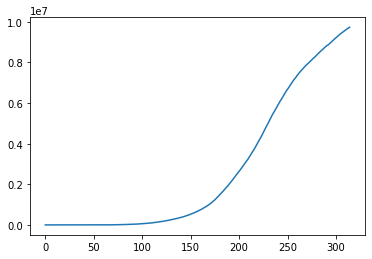

In [23]:
plt.plot(tots.values)

In [24]:
df.tail(100)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,NewDate
9191,9192,07/12/20,8:00 AM,Chandigarh,-,-,16814,291,18027,2020-12-07
9192,9193,07/12/20,8:00 AM,Chhattisgarh,-,-,223772,2989,246809,2020-12-07
9193,9194,07/12/20,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,3326,2,3342,2020-12-07
9194,9195,07/12/20,8:00 AM,Delhi,-,-,557914,9643,592250,2020-12-07
9195,9196,07/12/20,8:00 AM,Goa,-,-,46624,698,48686,2020-12-07
...,...,...,...,...,...,...,...,...,...,...
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261,2020-12-09
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945,2020-12-09
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141,2020-12-09
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173,2020-12-09
